## Credit Card Fraud Detection

By Meetra Nouri

The dataset contains transactions made by credit cards.

we want to understand dataset by exploring it!

In [ ]:
import scipy, sys
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

In [ ]:
np.random.seed(21)

In [ ]:
dataset=pd.read_csv('creditcard.csv')
dataset.head(2)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0


In [ ]:
print('shape of data:{}'.format(dataset.shape))

shape of data:(284807, 31)


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

There are missing values in feature columns{v16,...,class}

In [ ]:
dataset['Class'].value_counts()


0    284315
1       492
Name: Class, dtype: int64

In [ ]:
dataset['Class'].fillna(0)

0         0
1         0
2         0
3         0
4         0
         ..
284802    0
284803    0
284804    0
284805    0
284806    0
Name: Class, Length: 284807, dtype: int64

In [ ]:
dataset.describe().round(1)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.0,284807.0,284807.0,284807.0,284807.0,284807.0,284807.0,284807.0,284807.0,284807.0,284807.0,284807.0,284807.0,284807.0,284807.0,284807.0,284807.0,284807.0,284807.0,284807.0,284807.0,284807.0,284807.0,284807.0,284807.0,284807.0,284807.0,284807.0,284807.0,284807.0,284807.0
mean,94813.9,0.0,0.0,-0.0,0.0,-0.0,0.0,-0.0,-0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,0.0,0.0,-0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,-0.0,88.3,0.0
std,47488.1,2.0,1.7,1.5,1.4,1.4,1.3,1.2,1.2,1.1,1.1,1.0,1.0,1.0,1.0,0.9,0.9,0.8,0.8,0.8,0.8,0.7,0.7,0.6,0.6,0.5,0.5,0.4,0.3,250.1,0.0
min,0.0,-56.4,-72.7,-48.3,-5.7,-113.7,-26.2,-43.6,-73.2,-13.4,-24.6,-4.8,-18.7,-5.8,-19.2,-4.5,-14.1,-25.2,-9.5,-7.2,-54.5,-34.8,-10.9,-44.8,-2.8,-10.3,-2.6,-22.6,-15.4,0.0,0.0
25%,54201.5,-0.9,-0.6,-0.9,-0.8,-0.7,-0.8,-0.6,-0.2,-0.6,-0.5,-0.8,-0.4,-0.6,-0.4,-0.6,-0.5,-0.5,-0.5,-0.5,-0.2,-0.2,-0.5,-0.2,-0.4,-0.3,-0.3,-0.1,-0.1,5.6,0.0
50%,84692.0,0.0,0.1,0.2,-0.0,-0.1,-0.3,0.0,0.0,-0.1,-0.1,-0.0,0.1,-0.0,0.1,0.0,0.1,-0.1,-0.0,0.0,-0.1,-0.0,0.0,-0.0,0.0,0.0,-0.1,0.0,0.0,22.0,0.0
75%,139320.5,1.3,0.8,1.0,0.7,0.6,0.4,0.6,0.3,0.6,0.5,0.7,0.6,0.7,0.5,0.6,0.5,0.4,0.5,0.5,0.1,0.2,0.5,0.1,0.4,0.4,0.2,0.1,0.1,77.2,0.0
max,172792.0,2.5,22.1,9.4,16.9,34.8,73.3,120.6,20.0,15.6,23.7,12.0,7.8,7.1,10.5,8.9,17.3,9.3,5.0,5.6,39.4,27.2,10.5,22.5,4.6,7.5,3.5,31.6,33.8,25691.2,1.0


In [ ]:
dataset.corr()['Class'].sort_values(ascending=False)

Class     1.000000
V11       0.154876
V4        0.133447
V2        0.091289
V21       0.040413
V19       0.034783
V20       0.020090
V8        0.019875
V27       0.017580
V28       0.009536
Amount    0.005632
V26       0.004455
V25       0.003308
V22       0.000805
V23      -0.002685
V15      -0.004223
V13      -0.004570
V24      -0.007221
Time     -0.012323
V6       -0.043643
V5       -0.094974
V9       -0.097733
V1       -0.101347
V18      -0.111485
V7       -0.187257
V3       -0.192961
V16      -0.196539
V10      -0.216883
V12      -0.260593
V14      -0.302544
V17      -0.326481
Name: Class, dtype: float64

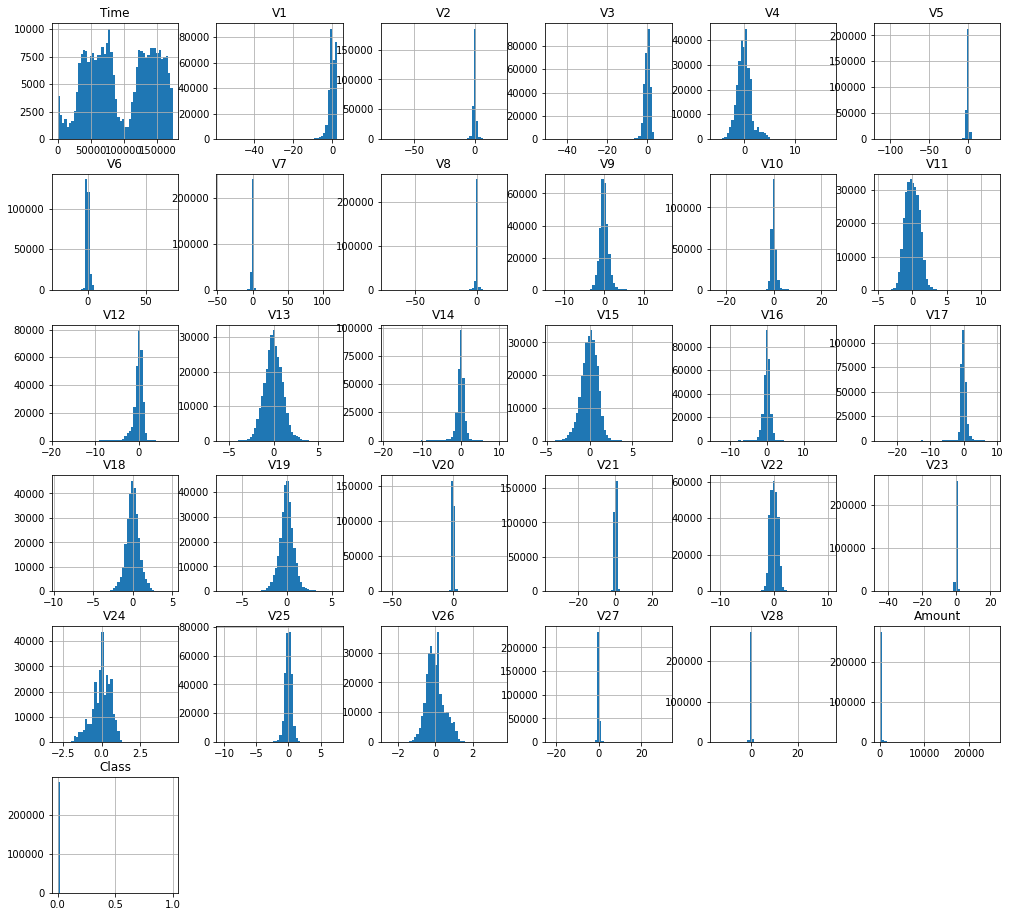

In [ ]:
dataset.hist(bins=50,figsize=(17,16));

In [ ]:
x=dataset.drop('Class', axis=1)
y=dataset['Class'].copy()

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.25, stratify=y)

In [ ]:
data, target= x_train, y_train


In [ ]:
valid=target[target==0]
fraud=target[target==1]

print('valid transactions: {}'.format(len(valid)))
print('fraud transactions: {}'.format(len(fraud)))

valid transactions: 213236
fraud transactions: 369


**Isolation Forest Algorithm.**

Return the anomaly score of each sample using the IsolationForest algorithm

The IsolationForest 'isolates' observations by randomly selecting a feature
and then randomly selecting a split value between the maximum and minimum
values of the selected feature.

Since recursive partitioning can be represented by a tree structure, the
number of splittings required to isolate a sample is equivalent to the path
length from the root node to the terminating node.

sklearn.ensemble.IsolationForest(*, n_estimators=100, max_samples='auto', contamination='auto', max_features=1.0, bootstrap=False, n_jobs=None, random_state=None, verbose=0, warm_start=False)

In [ ]:
outlier=len(fraud)/len(valid)
outlier

0.0017304770301450037

In [ ]:
from sklearn.ensemble import IsolationForest

outlier=len(fraud)/len(valid)

iso_forest=IsolationForest(n_estimators=20,max_samples=len(data),
                           contamination=outlier,
                           random_state=42)#The number of samples to draw from X to train each base estimator.

y_pred=iso_forest.fit_predict(data, target)

In [ ]:
np.unique(y_pred)

array([-1,  1])

In [ ]:
y_pred[y_pred==1]=0
y_pred[y_pred==-1]=1

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(target, y_pred)

0.997551555441118

In [ ]:
from sklearn.metrics import classification_report

iso_report=classification_report(target, y_pred, output_dict=True)
pd.DataFrame(iso_report).T

,precision,recall,f1-score,support
0,0.998776,0.998771,0.998774,213236.000000
1,0.291892,0.292683,0.292287,369.000000
accuracy,0.997552,0.997552,0.997552,0.997552
macro avg,0.645334,0.645727,0.645530,213605.000000
weighted avg,0.997555,0.997552,0.997553,213605.000000


Unsupervised Outlier Detection using **Local Outlier Factor (LOF)**




The anomaly score of each sample is called Local Outlier Factor. It measures the local deviation of density of a given sample with respect to its neighbors. It is local in that the anomaly score depends on how isolated the object is with respect to the surrounding neighborhood. More precisely, locality is given by k-nearest neighbors, whose distance is used to estimate the local density. By comparing the local density of a sample to the local densities of its neighbors, one can identify samples that have a substantially lower density than their neighbors. These are considered outliers.

class sklearn.neighbors.LocalOutlierFactor(n_neighbors=20, *, algorithm='auto', leaf_size=30, metric='minkowski', p=2, metric_params=None, contamination='auto', novelty=False, n_jobs=None)

**Attributes**

negative_outlier_factor_

The opposite LOF of the training samples. The higher, the more normal. Inliers tend to have a LOF score close to 1 (negative_outlier_factor_ close to -1), while outliers tend to have a larger LOF score.

The local outlier factor (LOF) of a sample captures its supposed ‘degree of abnormality’. It is the average of the ratio of the local reachability density of a sample and those of its k-nearest neighbors.

Predict the labels (1 inlier, -1 outlier) of X according to LOF.



In [ ]:
from sklearn.neighbors import LocalOutlierFactor

outlier=len(fraud)/len(valid)
lof=LocalOutlierFactor(n_neighbors=20, contamination=outlier)

y_pred_lof=lof.fit_predict(data)


In [ ]:
np.unique(y_pred_lof)

array([-1,  1])

In [ ]:
y_pred_lof[y_pred_lof==1]=0
y_pred_lof[y_pred_lof==-1]=1

In [ ]:
accuracy_score(target, y_pred_lof)

0.9967088785374875

In [ ]:
lof_report=classification_report(target, y_pred_lof,output_dict=True)

In [ ]:
pd.DataFrame(lof_report).T

,precision,recall,f1-score,support
0,0.998354,0.998349,0.998352,213236.000000
1,0.048649,0.048780,0.048714,369.000000
accuracy,0.996709,0.996709,0.996709,0.996709
macro avg,0.523501,0.523565,0.523533,213605.000000
weighted avg,0.996713,0.996709,0.996711,213605.000000
